In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
path=r"C:\Users\deepa\Downloads\placement.csv"

In [67]:
df=pd.read_csv(path)
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [68]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [69]:
# there is no missing value in this dataset

C:\Users\deepa\AppData\Local\Temp\ipykernel_23128\158977021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


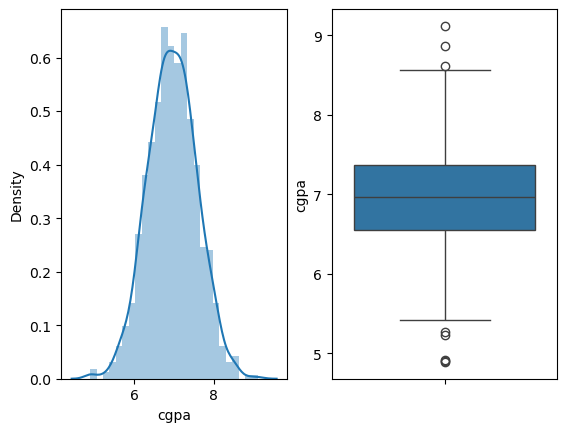

In [70]:
fig=plt.figure()
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(df['cgpa'])	
plt.show()

In [71]:
# from the distplot we can conclude that cgpa feature is normalised and placement_exam_marks is not normalised
# so we will detect outlier using z score method from cgpa column

In [72]:
# using z score method ,safe range is (mean-3*std,mean+3*std) ,if any datapoint will not reside in this range then this will considered as outlier

In [73]:
upper_lim=df['cgpa'].mean() + 3*df['cgpa'].std()
lower_lim=df['cgpa'].mean() - 3*df['cgpa'].std()
lower_lim

np.float64(5.113546374602832)

Trimming: Basically we will remove the outlier rows

In [74]:
# the dataframe that is outlier
outlier_df=df[(df['cgpa']>8.808 ) | (df['cgpa']<5.113)]

In [75]:
outlier_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [76]:
new_df=df[(df['cgpa']<=8.808) & (df['cgpa']>=5.113)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [77]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


In [78]:
df.shape

(1000, 3)

In [79]:
new_df.shape

(995, 3)

We have removed the 5 outlier from this dataset

In [80]:
# Capping

In [81]:
new_d=np.where(
    df['cgpa']>8.808,
    upper_lim,
    np.where(
        df['cgpa']<5.113,
        lower_lim,
        df['cgpa']
    )
)
new_d

array([7.19      , 7.46      , 7.54      , 6.42      , 7.23      ,
       7.3       , 6.69      , 7.12      , 6.45      , 7.75      ,
       6.82      , 6.38      , 6.58      , 5.68      , 7.91      ,
       7.1       , 6.53      , 7.56      , 6.93      , 7.63      ,
       6.69      , 7.43      , 6.76      , 6.05      , 6.44      ,
       6.28      , 7.45      , 6.53      , 7.23      , 6.51      ,
       7.46      , 7.66      , 5.91      , 6.23      , 8.15      ,
       7.48      , 6.85      , 8.51      , 6.58      , 7.25      ,
       6.6       , 6.7       , 7.46      , 7.85      , 7.88      ,
       6.92      , 7.3       , 6.92      , 6.29      , 8.23      ,
       6.2       , 6.24      , 7.53      , 6.69      , 8.42      ,
       8.12      , 6.93      , 7.73      , 7.34      , 7.7       ,
       7.94      , 7.51      , 7.61      , 6.22      , 6.98      ,
       6.27      , 6.67      , 8.04      , 6.58      , 7.41      ,
       6.98      , 6.13      , 7.9       , 6.39      , 6.16   

In [82]:
df['cgpa']=new_d

In [83]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [84]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


C:\Users\deepa\AppData\Local\Temp\ipykernel_23128\4094585537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_23128\4094585537.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa'])


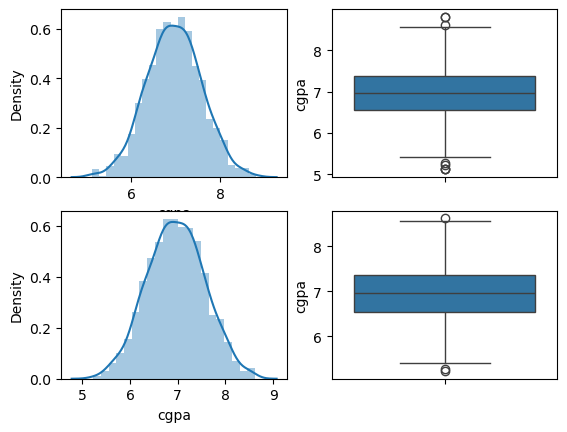

In [85]:
fig=plt.figure()
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df['cgpa'])	


plt.show()